# Vietnamese Characters Datasets (VCD)
__author__ = "Trung Phong Le @ GCS-VN"

__email__ = "phongtle@gcs-vn.com"

__startDate__ = "25/03/18"

__version__ = "0.0.1"

__status__ ="Being a handsome DEV"

__maintainer__ = "Trung Phong Le"

# 1) Introduction 
I collected data from 81 persons. Each person wrote 140 Vietnamese characters. So, I had 140*81 = 11340 characters,with 70 clasess: A-Z,a-z,0-9. After cleaning data,I had 11226 samples for 70 classes.There are about 130-200 sample/class. And I saved all in loadData function,you just need to call loadData function to load VCD datasets.

In [1]:
from VCD import test
from sklearn.utils import shuffle
import numpy as np
import matplotlib.pyplot as plt

Shape of x and y : (18654, 784) (18654,)


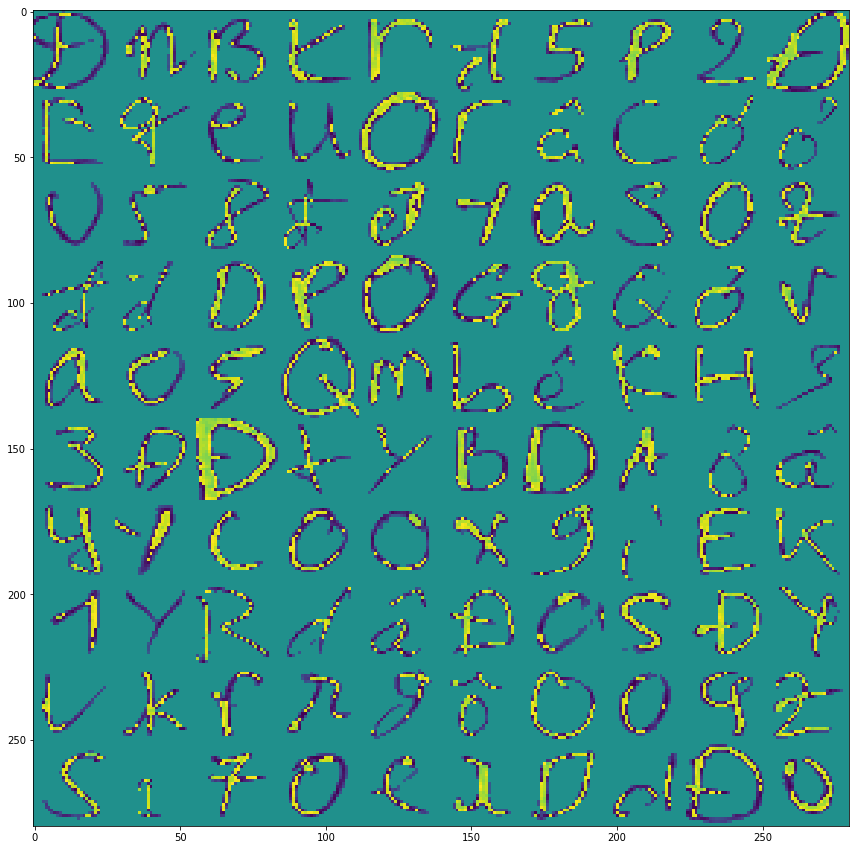

In [2]:

x,y = loadData()
x,y = shuffle(x,y)
print("Shape of x and y :",x.shape,y.shape)
x_viz = np.zeros((28*10,28*10),dtype='int8')
idx = 0
for i in range(10):
    for j in range(10):
        x_viz[i*28:i*28+28,j*28:j*28+28] = x[idx].reshape(28,28)
        idx +=1 
plt.figure(figsize=(15,15))
plt.imshow(x_viz)
    

# 2) Evaluate VCD on CNN model

In [2]:
from pp4 import CNN_model
from keras.utils import np_utils
""" Module to implement pp4 using keras """
from keras.layers import Input
from keras.layers import Conv2D
from keras.layers import Activation
from keras.layers import AveragePooling2D
from keras.models import Model
from keras.layers import Flatten
from keras.layers import Dense,Dropout
from keras.datasets import mnist
from keras.utils import np_utils
from keras.optimizers import RMSprop, SGD
from keras import backend as K
from keras.callbacks import ModelCheckpoint,LearningRateScheduler
from keras.initializers import RandomNormal 
import numpy as np
import scipy.ndimage.interpolation as nd
import matplotlib.pyplot as plt
from keras.models import load_model
from sklearn.utils import shuffle
from keras.layers import ZeroPadding2D
from keras.initializers import RandomUniform
import math
from keras.optimizers import adam 

Using TensorFlow backend.


In [14]:
# Data train 
f = np.load('/home/ltp-ubuntu/Documents/final/report/datanew/data_V2/data_v2.npz')
# f = np.load('/home/ltp-ubuntu/Documents/final/datanew/data_V2/data_v2.npz')
x = f['x']
y= f['y']

In [3]:
print(x.shape,y.shape)

(18654, 784) (18654,)


In [16]:
x,y = shuffle(x,y)
x_train = x[:16000]
y_train = y[:16000]
x_test = x[16000:]
y_test = y[16000:]
print(x_train.shape,y_train.shape)
print(x_test.shape,y_test.shape)

(16000, 784) (16000,)
(2654, 784) (2654,)


In [5]:
dic1 = {}
dic1['x'] = x_train
dic1['y'] = y_train
np.savez('train_v2.npz',**dic1)

In [6]:
dic2 = {}
dic2['x'] = x_test
dic2['y'] = y_test
np.savez('test_v2.npz',**dic2)

In [7]:
print(x_train.shape,y.shape)

(16000, 784) (18654,)


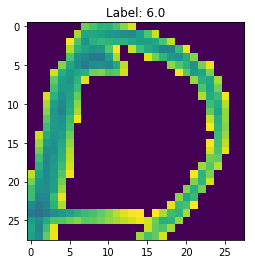

True

In [19]:
test(x_train,y_train,4000)

In [20]:

""" Pre processing """
x_train = x_train.reshape(x_train.shape[0],28,28,1)/255
y_train = np_utils.to_categorical(y_train,40)
x_train,y_train = shuffle(x_train,y_train)
print(x_train.shape,y_train.shape)

(16000, 28, 28, 1) (16000, 40)


In [29]:
def step_decay(epoch):
    initial_lrate = 0.05
    drop = 0.993
    epochs_drop = 1
    lrate = initial_lrate * math.pow(drop, math.floor((1+epoch)/epochs_drop))
    return lrate

""" Input """
inputs = Input(shape=(28,28,1)) #28x28
random_weight = RandomUniform(minval=-0.05, maxval=0.05, seed=None)
""" Convolution Layer 1 """
x = ZeroPadding2D(padding=(1,1))(inputs) #29x29
x = Conv2D(filters=20,kernel_size=(5,5),strides=(1,1),
           activation='tanh',padding='same',name='C1')(x) #29x29
""" Convolution Layer 2 """
x = Conv2D(filters=40,kernel_size=(5,5),strides=(1,1),
           activation='tanh',padding='same',name='C2')(x) #29x29
""" Convolution Layer 3 """
x = Conv2D(filters=60,kernel_size=(5,5),strides=(1,1),
           activation='tanh',padding='same',name='C3')(x) #29x29
""" Convolution Layer 4 """
x = Conv2D(filters=80,kernel_size=(5,5),strides=(2,2),
           activation='tanh',padding='valid',name='C4')(x) #13x13
""" Convolution Layer 5 """
x = Conv2D(filters=100,kernel_size=(5,5),strides=(2,2),
           activation='tanh',padding='valid',name='C5')(x) #5x5
""" Convolution Layer 6 """
x = Conv2D(filters=120,kernel_size=(5,5),strides=(2,2),
           activation='tanh',padding='valid',name='C6')(x) #1x1
""" Full connection Layer """
x = Flatten(name='Flatten')(x)
x = Dropout(rate = 0.2,name = 'Drop1')(x)
x = Dense(units=150,activation='tanh',
          kernel_initializer=random_weight,name='F7')(x)
x = Dropout(rate = 0.8,name = 'Drop2')(x)
x = Dense(units=70,activation='softmax',
          kernel_initializer=random_weight,name='Output')(x)
""" Create model """
model = Model(inputs,x,name='Large deep CNN')
sgd = SGD(lr=0.0,momentum=0.0,decay=0.0, nesterov=False )
model.compile(loss='categorical_crossentropy',optimizer=sgd,metrics=["accuracy"])
# checkpoint
filepath="epoch/CNN-{epoch:02d}-{loss:.2f}--{val_loss:.2f}--{acc:.2f}--{val_acc:.2f}.hdf5"
checkpoint = ModelCheckpoint(filepath, monitor=['loss','val_loss','acc','val_acc'], verbose=1, save_best_only=False,save_weights_only=False, mode='max')
""" Setup learning rate """
lrate = LearningRateScheduler(step_decay)
# Training
model.fit(x_train,y_train,epochs=50,batch_size = 64,validation_split=0.1,
          verbose=1,shuffle=True, callbacks=[lrate,checkpoint])

# Save model
model.save('model.h5')

Train on 14400 samples, validate on 1600 samples
Epoch 1/50
14400/14400 [==============================] - 288s 20ms/step - loss: 4.2272 - acc: 0.0247 - val_loss: 4.0682 - val_acc: 0.0781

Epoch 00001: saving model to epoch/CNN-01-4.23--4.07--0.02--0.08.hdf5
Epoch 2/50
14400/14400 [==============================] - 279s 19ms/step - loss: 3.4906 - acc: 0.1309 - val_loss: 2.9873 - val_acc: 0.2606

Epoch 00002: saving model to epoch/CNN-02-3.49--2.99--0.13--0.26.hdf5
Epoch 3/50
14400/14400 [==============================] - 276s 19ms/step - loss: 2.7096 - acc: 0.2715 - val_loss: 2.2787 - val_acc: 0.4313

Epoch 00003: saving model to epoch/CNN-03-2.71--2.28--0.27--0.43.hdf5
Epoch 4/50
14400/14400 [==============================] - 308s 21ms/step - loss: 2.2806 - acc: 0.3647 - val_loss: 1.8612 - val_acc: 0.4994

Epoch 00004: saving model to epoch/CNN-04-2.28--1.86--0.36--0.50.hdf5
Epoch 5/50
14400/14400 [==============================] - 293s 20ms/step - loss: 2.0123 - acc: 0.4286 - val_los


Epoch 00039: saving model to epoch/CNN-39-0.42--0.67--0.85--0.77.hdf5
Epoch 40/50
14400/14400 [==============================] - 271s 19ms/step - loss: 0.4208 - acc: 0.8454 - val_loss: 0.6850 - val_acc: 0.7800

Epoch 00040: saving model to epoch/CNN-40-0.42--0.68--0.85--0.78.hdf5
Epoch 41/50
14400/14400 [==============================] - 299s 21ms/step - loss: 0.4128 - acc: 0.8458 - val_loss: 0.6718 - val_acc: 0.7738

Epoch 00041: saving model to epoch/CNN-41-0.41--0.67--0.85--0.77.hdf5
Epoch 42/50
14400/14400 [==============================] - 319s 22ms/step - loss: 0.4044 - acc: 0.8519 - val_loss: 0.7011 - val_acc: 0.7712

Epoch 00042: saving model to epoch/CNN-42-0.40--0.70--0.85--0.77.hdf5
Epoch 43/50
14400/14400 [==============================] - 292s 20ms/step - loss: 0.3868 - acc: 0.8575 - val_loss: 0.6789 - val_acc: 0.7688

Epoch 00043: saving model to epoch/CNN-43-0.39--0.68--0.86--0.77.hdf5
Epoch 44/50
14400/14400 [==============================] - 288s 20ms/step - loss: 0.3

In [35]:
history = model.fit(x_train,y_train,epochs=1,batch_size = 64,validation_split=0.1,
          verbose=1,shuffle=True, callbacks=[lrate,checkpoint])

Train on 14400 samples, validate on 1600 samples
Epoch 1/1
14400/14400 [==============================] - 318s 22ms/step - loss: 0.3672 - acc: 0.8617 - val_loss: 0.7479 - val_acc: 0.7694

Epoch 00001: saving model to epoch/CNN-01-0.37--0.75--0.86--0.77.hdf5


{'acc': [0.09645833333333333, 0.23423611111111112, 0.32104166666666667, 0.376875, 0.4099305555555556, 0.44375, 0.4666666666666667, 0.48819444444444443, 0.5047916666666666, 0.515, 0.5315277777777778, 0.5389583333333333, 0.5514583333333334, 0.5596527777777778, 0.5689583333333333, 0.5790277777777778, 0.5790277777777778, 0.583125, 0.5958333333333333, 0.5979166666666667, 0.6071527777777778, 0.6075, 0.6211805555555555, 0.6195833333333334, 0.6311111111111111, 0.6317361111111112, 0.6384722222222222, 0.6386111111111111, 0.6434027777777778, 0.6404166666666666, 0.6515972222222223, 0.6513888888888889, 0.655625, 0.6622916666666666, 0.6664583333333334, 0.6690277777777778, 0.6689583333333333, 0.6697916666666667, 0.6808333333333333, 0.6793055555555556, 0.6758333333333333, 0.68, 0.6852083333333333, 0.688125, 0.6872222222222222, 0.6913888888888889, 0.6928472222222222, 0.6910416666666667, 0.6960416666666667, 0.6996527777777778], 'loss': [3.484312981499566, 2.931718118455675, 2.538209294213189, 2.28352234

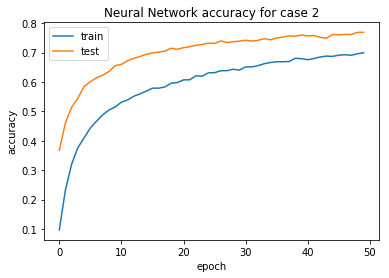

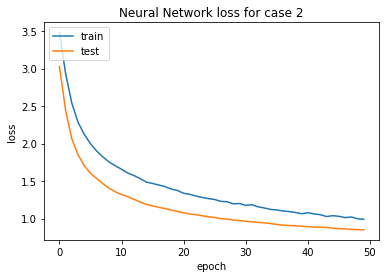

In [23]:
# list all data in history
print(history.history)
# summarize history for accuracy
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('Neural Network accuracy for case 2')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Neural Network loss for case 2')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [21]:
def step_decay(epoch):
    initial_lrate = 0.05
    drop = 0.993
    epochs_drop = 1
    lrate = initial_lrate * math.pow(drop, math.floor((1+epoch)/epochs_drop))
    return lrate
""" Input """
inputs = Input(shape=(28,28,1)) #28x28
random_weight = RandomUniform(minval=-0.05, maxval=0.05, seed=None)
""" Full connection Layer """
x = Flatten(name='Flatten')(inputs)
x = Dropout(rate = 0.2,name = 'Drop1')(x)
x = Dense(units=700,activation='relu',name='F7')(x)
x = Dropout(rate = 0.8,name = 'Drop2')(x)
x = Dense(units=40,activation='softmax',name='Output')(x)
""" Create model """
model = Model(inputs,x,name='Large deep CNN')
sgd = SGD(lr=0.0,momentum=0.0,decay=0.0, nesterov=False )
model.compile(loss='categorical_crossentropy',optimizer='sgd',metrics=["accuracy"])
# checkpoint
filepath="epoch/CNN-{epoch:02d}-{loss:.2f}--{val_loss:.2f}--{acc:.2f}--{val_acc:.2f}.hdf5"
checkpoint = ModelCheckpoint(filepath, monitor=['loss','val_loss','acc','val_acc'], verbose=1, save_best_only=False,save_weights_only=False, mode='max')
""" Setup learning rate """
lrate = LearningRateScheduler(step_decay)
# Training
history = model.fit(x_train,y_train,epochs=50,batch_size = 64,validation_split=0.1,
          verbose=1,shuffle=True, callbacks=[lrate,checkpoint])

# Save model
model.save('nnmodel.h5')

Train on 14400 samples, validate on 1600 samples
Epoch 1/50
14400/14400 [==============================] - 4s 302us/step - loss: 3.4843 - acc: 0.0965 - val_loss: 3.0283 - val_acc: 0.3675

Epoch 00001: saving model to epoch/CNN-01-3.48--3.03--0.10--0.37.hdf5
Epoch 2/50
14400/14400 [==============================] - 3s 193us/step - loss: 2.9317 - acc: 0.2342 - val_loss: 2.4408 - val_acc: 0.4619

Epoch 00002: saving model to epoch/CNN-02-2.93--2.44--0.23--0.46.hdf5
Epoch 3/50
14400/14400 [==============================] - 3s 198us/step - loss: 2.5382 - acc: 0.3210 - val_loss: 2.0604 - val_acc: 0.5144

Epoch 00003: saving model to epoch/CNN-03-2.54--2.06--0.32--0.51.hdf5
Epoch 4/50
14400/14400 [==============================] - 3s 208us/step - loss: 2.2835 - acc: 0.3769 - val_loss: 1.8508 - val_acc: 0.5456

Epoch 00004: saving model to epoch/CNN-04-2.28--1.85--0.38--0.55.hdf5
Epoch 5/50
14400/14400 [==============================] - 3s 227us/step - loss: 2.1224 - acc: 0.4099 - val_loss: 1.

14400/14400 [==============================] - 3s 192us/step - loss: 1.0648 - acc: 0.6793 - val_loss: 0.8975 - val_acc: 0.7600

Epoch 00040: saving model to epoch/CNN-40-1.06--0.90--0.68--0.76.hdf5
Epoch 41/50
14400/14400 [==============================] - 3s 190us/step - loss: 1.0768 - acc: 0.6758 - val_loss: 0.8932 - val_acc: 0.7569

Epoch 00041: saving model to epoch/CNN-41-1.08--0.89--0.68--0.76.hdf5
Epoch 42/50
14400/14400 [==============================] - 3s 187us/step - loss: 1.0616 - acc: 0.6800 - val_loss: 0.8872 - val_acc: 0.7581

Epoch 00042: saving model to epoch/CNN-42-1.06--0.89--0.68--0.76.hdf5
Epoch 43/50
14400/14400 [==============================] - 3s 187us/step - loss: 1.0516 - acc: 0.6852 - val_loss: 0.8849 - val_acc: 0.7519

Epoch 00043: saving model to epoch/CNN-43-1.05--0.88--0.69--0.75.hdf5
Epoch 44/50
14400/14400 [==============================] - 3s 188us/step - loss: 1.0268 - acc: 0.6881 - val_loss: 0.8817 - val_acc: 0.7488

Epoch 00044: saving model to epo

In [3]:
# Data train 
f1 = np.load('test_v2.npz')
# f = np.load('/home/ltp-ubuntu/Documents/final/datanew/data_V2/data_v2.npz')
x_test = f1['x']
y_test = f1['y']

In [4]:
print(x_test.shape,y_test.shape)
""" Pre processing """
x_test = x_test.reshape(x_test.shape[0],28,28,1)/255
y_test = np_utils.to_categorical(y_test,40)
x_test,y_test = shuffle(x_test,y_test)
print(x_test.shape,y_test.shape)

(2654, 784) (2654,)
(2654, 28, 28, 1) (2654, 40)


In [5]:
print(x_test.shape,y_test.shape)

(2654, 28, 28, 1) (2654, 40)


In [6]:
model1 = load_model("nnmodel.h5")
# from keras.models import load_model
# model = load_model('model.h5')
print(x_test.shape,y_test.shape)
acc = model1.evaluate(x_test,y_test)
print("Accuracy on test data is %.2f"%(acc[1]*100))

(2654, 28, 28, 1) (2654, 40)
2654/2654 [==============================] - 0s 126us/step
Accuracy on test data is 82.33


In [7]:
# from keras.models import load_model
model = load_model('cnnmodel.h5')
print(x_test.shape,y_test.shape)
acc = model.evaluate(x_test,y_test)
print("Accuracy on test data is %.2f"%(acc[1]*100))

(2654, 28, 28, 1) (2654, 40)
2654/2654 [==============================] - 35s 13ms/step
Accuracy on test data is 96.04


In [9]:
# Data train 
f1 = np.load('train_v2.npz')
# f = np.load('/home/ltp-ubuntu/Documents/final/datanew/data_V2/data_v2.npz')
x = f1['x']
y = f1['y']
x = x.reshape(x.shape[0],28,28,1)/255
y = np_utils.to_categorical(y,40)
x_train = x[:14000]
y_train = y[:14000]
x_val = x[14000:]
y_val = y[14000:]
""" Pre processing """

' Pre processing '

In [11]:
import glob

In [12]:
all_file = sorted(glob.glob("cnnepoch/*.hdf5"))
# print(all_file)
acc_test = []
loss_test = []
acc_train = []
loss_train = []
for file in all_file:
    model = load_model(file)
    a = model.evaluate(x_val,y_val)
    b = model.evaluate(x_train,y_train)
    print(a,b)
    acc_test.append(a[1])
    loss_test.append(a[0])
    acc_train.append(b[1])
    loss_train.append(b[0])

14000/14000 [==============================] - 176s 13ms/step
[2.283055377960205, 0.403] [2.288297179903303, 0.4019285714285714]
14000/14000 [==============================] - 160s 11ms/step
[1.466589409828186, 0.6115] [1.4791512410300118, 0.6012857142857143]
14000/14000 [==============================] - 168s 12ms/step
[1.074934982776642, 0.701] [1.09306273828234, 0.6997142857142857]
14000/14000 [==============================] - 157s 11ms/step
[0.870550582408905, 0.7565] [0.8760382980619158, 0.7560714285714286]
14000/14000 [==============================] - 161s 12ms/step
[0.675931366443634, 0.805] [0.7002377838407244, 0.7997142857142857]
14000/14000 [==============================] - 164s 12ms/step
[0.5845822803974151, 0.8275] [0.6072582075595856, 0.822]
14000/14000 [==============================] - 171s 12ms/step
[0.49640812373161314, 0.862] [0.5129216322387968, 0.8487857142857143]
14000/14000 [==============================] - 171s 12ms/step
[0.4554768469333649, 0.863] [0.4654044

KeyboardInterrupt: 

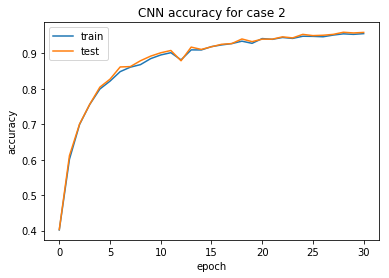

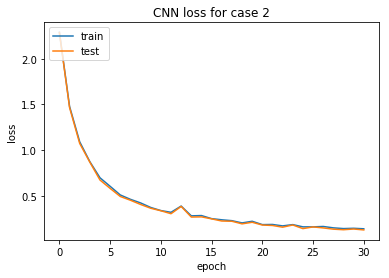

In [15]:
# list all data in history
# print(history.history)
# summarize history for accuracy
plt.plot(acc_train)
plt.plot(acc_test)
plt.title('CNN accuracy for case 2')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(loss_train)
plt.plot(loss_test)
plt.title('CNN loss for case 2')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

### Acuracy on test data is 96.81% => I had issue about overfiting of model or some issues about data such as: O and o,they are same same,but they have different label . So I think I need more data or I have to fix my data

# 3) Simple OCR

In [6]:
from keras.models import load_model
import cv2 
model = load_model('model.h5')

In [7]:
label = ['A','Ă','Â','B','C','D','Đ','E','Ê','G','H','I','K','L','M','N','O','Ô','Ơ','P','Q','R','S','T','U',
         'Ư','V','X','Y','Z',0,1,2,3,4,5,6,7,8,9]
def predict(image_path):
    """
    Function: This function predicts text from text image...
    Input:
        image_path: string,path to the image
    output:
        text: string,result after predicting 
    """
    """ Segment each character from image """
    
    result = {}
    img = cv2.imread(image_path,0)
    a,b = img.shape
    ret,thresh = cv2.threshold(img,200,255,0)
    _,contours,hierarchy = cv2.findContours(thresh,cv2.RETR_LIST,cv2.CHAIN_APPROX_SIMPLE)
    idx_name = 0
    for cnt in contours:
        x,y,w,h = cv2.boundingRect(cnt)
        text = []      
        if(w*h>100 and w*h<a*b-100):
            roi = img[y-20:y+h+2,x-5:x+w+5]
            cv2.imwrite('segment/'+str(idx_name)+'.jpg',roi)
            roi = cv2.resize(roi,(28,28))
            roi[roi>200] = 0
            result[x] = label[model.predict(roi.reshape(1,28,28,1)).argmax()]
            idx_name += 1
            print(label[model.predict(roi.reshape(1,28,28,1)).argmax()])
    print([result[key] for key in sorted(result)])

In [15]:
from skimage.segmentation import clear_border
import numpy as np
import imutils
def predict2(image_path):
    result = {}
    img = cv2.imread(image_path,0)
    img = cv2.resize(img,(300,100))
    blur = cv2.GaussianBlur(img,(3,3), 0)
    thresh = cv2.adaptiveThreshold(blur,255,cv2.ADAPTIVE_THRESH_MEAN_C,cv2.THRESH_BINARY_INV, 7,10)
    thresh = clear_border(thresh)
    # find contours in the thresholded image, then initialize the
    # list of group locations
    clone = np.dstack([img.copy()] * 3)
    groupCnts = cv2.findContours(thresh.copy(), cv2.RETR_TREE,cv2.CHAIN_APPROX_SIMPLE)
    groupCnts = groupCnts[0] if imutils.is_cv2() else groupCnts[1]
    groupLocs = []
    clone = np.dstack([img.copy()] * 3)
    # loop over the group contours
    idx_name = 0
    are = 0 
    for cnt in groupCnts:
        x,y,w,h = cv2.boundingRect(cnt)
        if w*h > are:
            are = w*h
    print(are)
    for (i, c) in enumerate(groupCnts):
        # compute the bounding box of the contour
        (x, y, w, h) = cv2.boundingRect(c)
        # only accept the contour region as a grouping of characters if
        # the ROI is sufficiently large
        #if w >= 20 and h >= 20:
        if w*h > are/2:
            roi = img[y-20:y+h+3,x-3:x+w+3]
            cv2.imwrite('segment1/'+str(idx_name)+'.jpg',roi)
            roi = cv2.resize(roi,(28,28))
            roi[roi>200] = 0
            result[x] = label[model.predict(roi.reshape(1,28,28,1)).argmax()]
            idx_name += 1
            print(label[model.predict(roi.reshape(1,28,28,1)).argmax()])
    print([result[key] for key in sorted(result)])

In [18]:
i = 5
predict('test' + str(i) + '.jpg')
predict2('test' + str(i) + '.jpg')

Ă
Đ
I
['Ă', 'Đ', 'I']
1376
Đ
M
Ê
A
A
Ă
['A', 'A', 'Ê', 'Đ', 'M', 'Ă']


In [122]:
idx = 4
img = cv2.imread('segment1/'+str(idx)+'.jpg',0)
print('segment1/'+str(idx)+'.jpg')
img = cv2.resize(img,(28,28))
img[img>200] = 0
print(label[model.predict(img.reshape(1,28,28,1)).argmax()])

segment1/4.jpg
D1
